#### For this homework you can get 100 points + 20 bonus points. The bonus points will be counted into your total homework score until you get the maximum homework score, 400.

Copying and pasting other people's code is absolutely prohibited.  I will report to the education team if I find any such cases. Collaboration and discussion is highly encouraged, and feel free to exchange ideas with your classmates, but write your own code please. 

### Question 1: Accuracy and interpretability (10 pts)

__a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)__

The NYS Department of Education administers the Regents exam each year and may want to predict student performance before the exam is given. The DOE may be able to predict performance by considering attributes such as gender, socioeconomic status, test scores, and attendance. A decision tree would be preferable because the interpretability enables you to identify the attributes having the greatest impact on student performance. If you are able to identify the negative attributes, you can solve for them through test prep, resource allocation, etc. By using random forests, it may be more difficult to isolate attributes impacting student performance and therefore they can't be solved for nor improve the quality of education a student receives. 

__b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)__

The U.S. Department of Veterans Affairs conducts risk assessments of patients with mental disorders that have visited mental health facilities. Researchers have used random forests to predict suicide rates of at-risk patients after their visits to facilties, based on their assessment records. Accuracy is paramount becuase it can very literally be a matter of life and death for at-risk patients. If the VA is able to predict suicide amongst veterans they can target interventions and treatments, prescribe medication, and hopefully curb suicide rates. Understanding the weighting and influence of attributes within the model is less important than the accuracy of the results. 

__c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)__

Domingos' Knowledge Discovery Via Multiple Models introduces the idea of the 'Combined Multiple Methods' algorithm, a meta-learner that retains maximum accuracy of ensemble methods. The CMM algorithm allows for a classifier to be applied to model the partitioning produced by the combined models (ex. multiple decision trees in a random forest) by learning from a randomly generated data that has been predicted based on the combined modesls. 

###  Question 2: Build a tree by hand following exactly the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes. (30 pts + 20 pts)

30 points for parts a, b, c, d, f.
20 bonus points for optional part e.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data='MPG, cylinders, HP, weight\ngood, 4, 75, light\nbad, 6, 90, medium\nbad, 4, 110, medium\nbad, 8, 175, weighty\nbad, 6, 95, medium\nbad, 4, 94, light\nbad, 4, 95, light\nbad, 8, 139, weighty\nbad, 8, 190, weighty\nbad, 8, 145, weighty\nbad, 6, 100, medium\ngood, 4, 92, medium\nbad, 6, 100, weighty\nbad, 8, 170, weighty\ngood, 4, 89, medium\ngood, 4, 65, light\nbad, 6, 85, medium\ngood, 4, 81, light\nbad, 6, 95, medium\ngood, 4, 93, light'

In [3]:
data=",".join(data.split(", "))
print data

MPG,cylinders,HP,weight
good,4,75,light
bad,6,90,medium
bad,4,110,medium
bad,8,175,weighty
bad,6,95,medium
bad,4,94,light
bad,4,95,light
bad,8,139,weighty
bad,8,190,weighty
bad,8,145,weighty
bad,6,100,medium
good,4,92,medium
bad,6,100,weighty
bad,8,170,weighty
good,4,89,medium
good,4,65,light
bad,6,85,medium
good,4,81,light
bad,6,95,medium
good,4,93,light


#### Please use numpy and pandas to do the calculation for parts a) through d):

In [4]:
#a) Prepare the data set to a pandas dataframe from the given string (2 pts)
from StringIO import StringIO

output = StringIO(data)
df = pd.read_csv(output, sep=",")

In [5]:
#b) Start with the entire dataset and find the most common value (3 pts)
#Reference: http://codereview.stackexchange.com/questions/109089/id3-decision-tree-in-python

def get_max_freq(data):
    """
    Returns the unique value with the greatest frequency
    """
    value, count = np.unique(data, return_counts=True)
    stats = dict(zip(value, count))
    print max(stats,key=stats.get),max(count)

get_max_freq(df)

bad 14


In [6]:
#c) Use "information gain" as your decision rule to split your data into two groups. What is the split rule and what is the maximum value of the information gain? (5 pts)
#Reference: http://www.onlamp.com/pub/a/python/2006/02/09/ai_decision_trees.html?page=4
#Reference: https://courses.cs.washington.edu/courses/cse455/10au/notes/InfoGain.pdf

def create_mpg_dict(data):
    value, count = np.unique(data['MPG'], return_counts=True)
    dic = dict(zip(value, count))
    if 'good' in dic.keys():
        pass
    else:
        dic['good'] = 0
    if 'bad' in dic.keys():
        pass
    else:
        dic['bad'] = 0
        
    return dic


def entropy(X,Y):
    """
    Calculates the entropy for a target attribute value.
    """
    X = float(X)
    Y = float(Y)
    if X == 0.0:
        left = 0
    else: 
        left = (X*np.log2((X + Y)/X))
    if Y == 0.0:
        right = 0
    else: 
        right = (Y*np.log2((X+Y)/Y))
    return (left + right)


def info_gain(X,Y):
    """
    Calculates the information gain for data split.
    """
    B, A = create_mpg_dict(X).values()
    D, C = create_mpg_dict(Y).values()
    
    total_entropy = entropy((A+C),(B+D)) - entropy(A,B) - entropy(C,D)
    count = (A+B+C+D)
    return total_entropy/count


def find_best_split(data):
    gains = []

    for column in data:
        # splitting categorical data
        if column in ['cylinders', 'weight']:
            for i in data[column].unique():
                x = data[data[column] == i]
                y = data[data[column] != i]
                gains.append([info_gain(x,y),column,i])
        
        # splitting numerical data
        elif column in ['HP']:
            for i in data[column].unique():
                x = data[data[column] >= i]
                y = data[data[column] < i]
                gains.append([info_gain(x,y),'HP',i])
                
        else:
            pass
     
    gains.sort(key=lambda x: x[0], reverse=True)
    return gains

gainsList = find_best_split(df)
print 'The split rule is ' + str(gainsList[0][1]),str(gainsList[0][2]) + ', with max info gain: ' +str(gainsList[0][0])

The split rule is HP 94, with max info gain: 0.556779649447


In [7]:
#d) Repeat the process b) and c) until you can perfectly split the training data.  Show the resulting decision tree in a format of your choice, as long as the tree structure and the prediction at each leaf node are clearly shown.  Note that you are _not_ expected to prune the tree in parts d) and e). (10 pts)
    
# Splitting on horsepower
s1 = df[df['HP'] >= 94]
s2 = df[df['HP'] < 94]

# Finding next best split
find_best_split(s2)

# Splitting on cylinders
s3 = s2[s2['cylinders'] == 4]
s4 = s2[s2['cylinders'] != 4]

#### d) Decision Tree

                        Data 
                          |
                      HP >= 94
                      /     \
                   NO/       \YES
                    /         \
                   /           \
            Cylinders =4?     12 BAD
                 / \
              NO/   \YES
               /     \
              /       \
           2 BAD      6 GOOD
           

In [8]:
#f) Classify the following five vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  You can do this by hand using the tree structure learned in part d), or automatically using the function you wrote in part e). (10 pts)

#?,4,93,weighty
#?,8,70,light
#?,6,113,medium
#?,6,95,weighty
#?,4,115,medium

#### f) Decision Tree

                        Data 
                          |
                      HP >= 94
                      /     \
                   NO/       \YES
                    /         \
                   /           \
            Cylinders =4?     3 BAD
                 / \
              NO/   \YES
               /     \
              /       \
           1 BAD      1 GOOD
           

- good,4,93,weighty
- bad,8,70,light
- bad,6,113,medium
- bad,6,95,weighty
- bad,4,115,medium

### Question 3, Predicting burden of disease （40 pts)

In [9]:
data=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Burden of diarrheal illness by country.csv")
print("Here are the first three rows:")
data.iloc[0:3,:]

Here are the first three rows:


,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


#### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features using sklearn.tree.DecisionTreeClassifier. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

__a) Please choose a test/train split and choose a hyper-parameter governing model simplicity. For example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier for different values of this parameter and for each such value, record the corresponding AUC score. (10 pts)__

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs
from sklearn.preprocessing import label_binarize

#Split data into training and test set
data['Burden'] = data['BurdenOfDisease'].map({'low':1, 'medium':2, 'high':3, 'awful':4})


X = data[['FrxnPeaceIn10','ODA4H2OPcptaDol','RenewResm3PcptaYr','SustAccImprWatRur',
                   'SustAccImprWatUrb','SustAccImprSanRur','SustAccImprSanUrb','TotHlthExpPctofGDP',
                   'GenGovtPctofTotHlthExp','ExtResHlthPctTotExpHlth','PCptaGovtExpHlthAvgExcRt','GDPPCptaIntDol',
                   'AdultLtrcyRate','FemaleLtrcyRate']]

y = data.Burden

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=999)

In [11]:
#Use OS accuracy.
OS=[]
for i in range(2,20,1):
    classifier=DTC(max_leaf_nodes=i,random_state = 999)
    classifier.fit(X_train,y_train)
    OS.append(classifier.score(X_test,y_test))

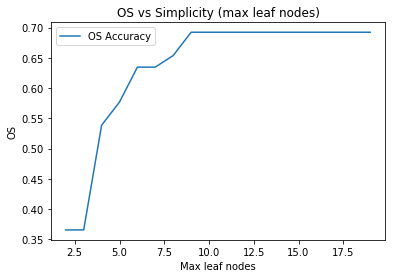

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(range(2,20,1),OS,label='OS Accuracy')
plt.xlabel("Max leaf nodes")
plt.ylabel("OS")
plt.title("OS vs Simplicity (max leaf nodes)")
plt.legend()

In [13]:
#Reference: http://stackoverflow.com/questions/31614277/how-to-label-binarize-multiclass-in-a-specific-class-order

real= np.array(y.apply(int))
y_binary = label_binarize(real, classes=[1, 2, 3, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = .4, random_state=999)

AUC=[]
for i in range(2,20,1):    
    classifier= DTC(max_leaf_nodes=i)
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    AUC.append(rs(y_test,pred,average='micro'))

In [14]:
AUC

[0.58333333333333337,
 0.57692307692307687,
 0.69230769230769218,
 0.71794871794871795,
 0.75641025641025639,
 0.75641025641025639,
 0.76923076923076916,
 0.79487179487179482,
 0.79807692307692302,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482,
 0.79487179487179482]

__b) Make a plot of performance vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be AUC score. (10 pts)__

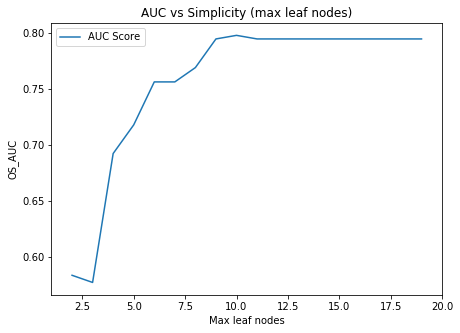

In [15]:
plt.figure(figsize=(7,5))
plt.plot(range(2,20,1),AUC,label='AUC Score')
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.xlim(1,20)
plt.legend()
plt.show()

__c) Tune the hyper-parameter you chose in part a) by cross-validation using the training data. You can choose to use a  package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the OS accuracy after tuning the hyper-parameter? (10 pts)__

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid ={'max_leaf_nodes':range(2,20,1)}

classifier=DTC()
gr=GridSearchCV(classifier,param_grid=param_grid)
rv=gr.fit(X_train,y_train)

print 'The OS score after tuning the hyper-parameter is ' + str(rv.score(X_test,y_test)) + '.'

The OS score after tuning the hyper-parameter is 0.692307692308.


__d) Visualize a simple decision tree (e.g. a “shallow” tree, or a tree with
few leaf nodes) classifier and report its performance. You can draw
the decision tree by hand or use a graphical representation (e.g.
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), but make sure it is easy to understand (e.g. the
features chosen for each split should be clearly labeled in each
internal node, as well as the prediction at each leaf node). (10 pts)__

In [17]:
from sklearn import tree
import pydotplus

#tree.export_graphviz(classifier, out_file='tree.dot')

### Question 4, Fit a random forest to the data from question 3 (20 pts)

__a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 2c). (10 pts)__

In [18]:
from sklearn.ensemble import RandomForestClassifier as RFC

rf = RFC(n_estimators=10, n_jobs=1,max_leaf_nodes=10, random_state=999)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

AUCscore=(rs(y_test, pred, average='micro'))
OSscore = rv.score(X_test,y_test)

print 'The AUC score is: ' + str(AUCscore) + '.'
print 'The OS score is: ' + str(OSscore) + '.'

The AUC score is: 0.730769230769.
The OS score is: 0.692307692308.


__b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)__

As expected, the accuracy for the random forest method was considerably higher than that of the decision tree model. The decision tree model is great for being able to interpret the results of your tree and visibly follow the splits at each node of the tree but the accuracy is much lower than the random forest model. At each step of splitting, you are able to see which attributes have the greatest information gain/impact on the tree. When constructing the decision tree from scratch, each step allows for complete transparency which isn't the case with random forest. The decision tree is especially susceptible to overfitting which is why it does not perform as well. The random forest model is less interpretable because it is unclear which decision trees the model is averaging and how they were created. Patterns that may have been clear in one mode is no longer clear upon combining multiple trees within the random forest.